#Importing Required Libraries

We are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.I will try to predict healthcare costs using a regression algorithm.

In [36]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [37]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-08-23 16:45:52--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2023-08-23 16:45:52 (96.8 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Make sure to convert categorical data to numbers. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.

Create a model and train it with the train_dataset. Run the final cell in this notebook to check your model. The final cell will use the unseen test_dataset to check how well the model generalizes.

To pass the challenge, model.evaluate must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the test_dataset and graph the results.

In [38]:
# Define categorical and numeric columns
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
NUMERIC_COLUMNS = ['age', 'bmi', 'children', 'expenses']

In [39]:
# Split data into categorical and numeric features
X_categorical = dataset[CATEGORICAL_COLUMNS]
X_numeric = dataset[NUMERIC_COLUMNS[:-1]]  # Excluding 'expenses' from features
y = dataset['expenses']

In [40]:
# Convert categorical data to numerical using one-hot encoding
X_categorical = pd.get_dummies(X_categorical, columns=CATEGORICAL_COLUMNS)

In [41]:
# Combine categorical and numeric features
X = pd.concat([X_numeric, X_categorical], axis=1)

In [42]:
# Split data into training and testing datasets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Define the model using Keras
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(train_dataset.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

In [49]:
# Compile the model with a specific learning rate
learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'])

In [50]:
# Train the model
history = model.fit(train_dataset, train_labels, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
27/27 - 1s - loss: 3194.7629 - mean_absolute_error: 3194.7629 - mean_squared_error: 39918220.0000 - val_loss: 2789.4722 - val_mean_absolute_error: 2789.4722 - val_mean_squared_error: 34633504.0000 - 1s/epoch - 51ms/step
Epoch 2/100
27/27 - 0s - loss: 3127.8777 - mean_absolute_error: 3127.8777 - mean_squared_error: 42179308.0000 - val_loss: 2800.0806 - val_mean_absolute_error: 2800.0806 - val_mean_squared_error: 35262196.0000 - 104ms/epoch - 4ms/step
Epoch 3/100
27/27 - 0s - loss: 3139.5298 - mean_absolute_error: 3139.5298 - mean_squared_error: 40924212.0000 - val_loss: 2749.4668 - val_mean_absolute_error: 2749.4668 - val_mean_squared_error: 34928732.0000 - 102ms/epoch - 4ms/step
Epoch 4/100
27/27 - 0s - loss: 3145.1582 - mean_absolute_error: 3145.1582 - mean_squared_error: 41576880.0000 - val_loss: 2787.7292 - val_mean_absolute_error: 2787.7292 - val_mean_squared_error: 34463084.0000 - 105ms/epoch - 4ms/step
Epoch 5/100
27/27 - 0s - loss: 3112.5654 - mean_absolute_error: 31

In [51]:
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

9/9 - 0s - loss: 2422.8218 - mean_absolute_error: 2422.8218 - mean_squared_error: 28137804.0000 - 38ms/epoch - 4ms/step
Testing set Mean Abs Error: 2422.82 expenses
You passed the challenge. Great job!


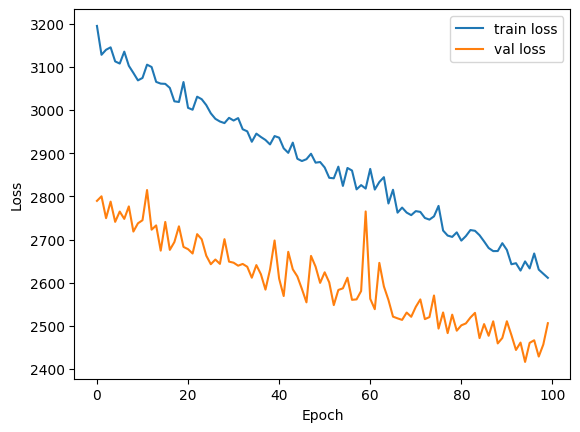

In [52]:
# Visualize the training loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

9/9 [==============================] - 0s 2ms/step


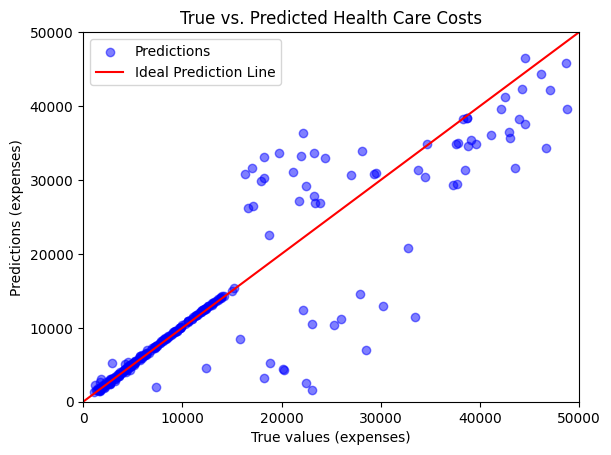

In [53]:
# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions, color='blue', alpha=0.5, label='Predictions')
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
plt.title('True vs. Predicted Health Care Costs')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, color='red', label='Ideal Prediction Line')  # Change the color of the line
plt.legend()
plt.show()